<a href="https://colab.research.google.com/github/MaschinenNah/MachineLearningKochbuch02_Generatoren/blob/main/05_BilderLadenMitValidierer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Dieses Beispiel ist beinahe identisch mit dem Beispiel [Dateien laden](https://colab.research.google.com/drive/1oGo4j3oGSKbrg-krFjMvcZa9RV0YTdmN?usp=sharing) - mit einem entscheidenden Unterschied: Hier bauen wir einen zweiten Generator, der Validierungsdaten liefert!

In [ ]:
from io import BytesIO
from urllib.request import urlopen
from zipfile import ZipFile

zipurl = "http://pitnoack.de/mn/generator_bilder_laden_validate/data.zip"
with urlopen(zipurl) as zipresp:
  with ZipFile(BytesIO(zipresp.read())) as zfile:
    zfile.extractall()

# Credit: https://svaderia.github.io/articles/downloading-and-unzipping-a-zipfile/

In [ ]:
from tensorflow.keras.utils import Sequence
import numpy as np
from PIL import Image
import os
import random

class ImageGenerator(Sequence):

  def __init__(self, dir_, shape, batch_size=25):
    filenames = os.listdir(dir_)
    self.len = int(len(filenames)/batch_size)
    self.shape = shape
    self.batch_size = batch_size
    self.file_paths = [os.path.join(dir_, filename) for filename in filenames]
    random.shuffle(self.file_paths)

  def __len__(self):
    return self.len

  def __getitem__(self, index):
    if index >= self.len:
      raise IndexError("list index out of range")
    else:
      file_paths = self.file_paths[index*self.batch_size:(index+1)*self.batch_size]
      batch_x = np.empty((self.batch_size,) + (self.shape), "float32")
      for idx, file_path in enumerate(file_paths):
        img = Image.open(file_path)
        batch_x[idx] = np.array(img).astype("float32")/255.0
      return batch_x, batch_x

In [ ]:
train_dir = "/content/data/img_train"

train_gen = ImageGenerator(train_dir, (48, 48, 3))

validate_dir = "/content/data/img_validate"

validate_gen = ImageGenerator(validate_dir, (48, 48, 3))

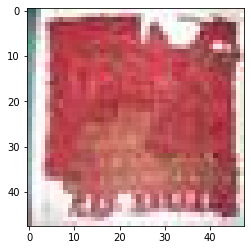

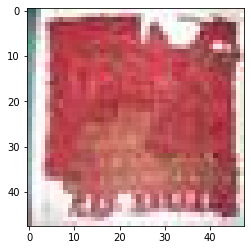

In [ ]:
from matplotlib import pyplot as plt

img_x = train_gen[1][0][0]

plt.imshow(img_x, cmap="gray")
plt.show()

img_y = train_gen[1][1][0]
plt.imshow(img_y, cmap="gray")
plt.show()


In [ ]:
import numpy as np

from keras.layers import Input, Flatten, Dense, Reshape, Lambda, Activation, BatchNormalization, LeakyReLU, Dropout
from keras.models import Model
from keras import backend as K
from keras.optimizers import Adam
from keras.datasets import mnist

shape = (48, 48, 3)

input_layer = Input(shape=shape)

x = Flatten()(input_layer)

x = Dense(units=6912, activation='sigmoid')(x)

output_layer = Reshape(shape)(x)

model = Model(input_layer, output_layer)

model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 48, 48, 3)]       0         
_________________________________________________________________
flatten (Flatten)            (None, 6912)              0         
_________________________________________________________________
dense (Dense)                (None, 6912)              47782656  
_________________________________________________________________
reshape (Reshape)            (None, 48, 48, 3)         0         
Total params: 47,782,656
Trainable params: 47,782,656
Non-trainable params: 0
_________________________________________________________________


In [ ]:
optimizer = Adam(lr=0.0005)

def r_loss(y_true, y_pred):
    return K.mean(K.square(y_true - y_pred), axis = [1,2,3])

model.compile(loss=r_loss, optimizer=optimizer)

In [ ]:
model.fit(train_gen,
          validation_data = validate_gen,
          epochs=10)

Epoch 1/10
91/91 [==============================] - 24s 260ms/step - loss: 0.0648 - val_loss: 0.0286
Epoch 2/10
91/91 [==============================] - 23s 257ms/step - loss: 0.0282 - val_loss: 0.0206
Epoch 3/10
91/91 [==============================] - 23s 257ms/step - loss: 0.0212 - val_loss: 0.0184
Epoch 4/10
91/91 [==============================] - 23s 257ms/step - loss: 0.0184 - val_loss: 0.0162
Epoch 5/10
91/91 [==============================] - 23s 255ms/step - loss: 0.0170 - val_loss: 0.0168
Epoch 6/10
91/91 [==============================] - 23s 257ms/step - loss: 0.0151 - val_loss: 0.0155
Epoch 7/10
91/91 [==============================] - ETA: 0s - loss: 0.0146

KeyboardInterrupt: ignored

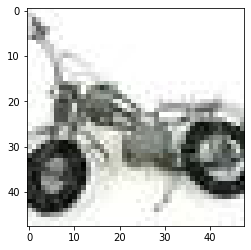

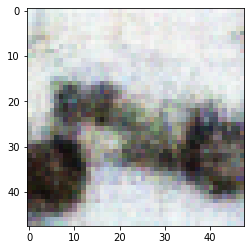

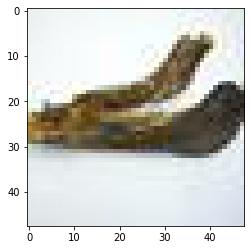

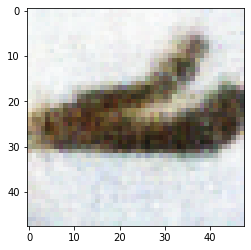

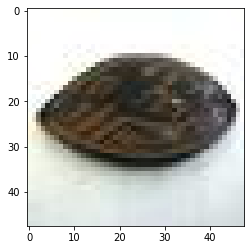

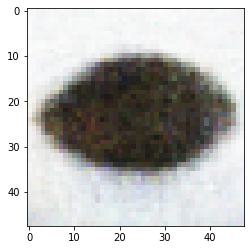

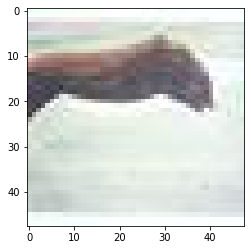

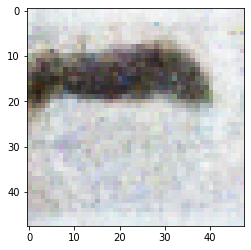

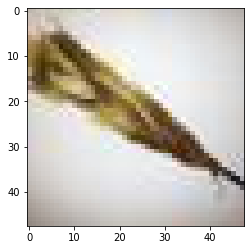

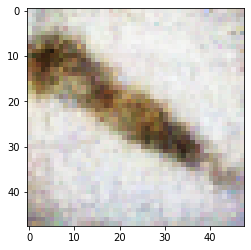

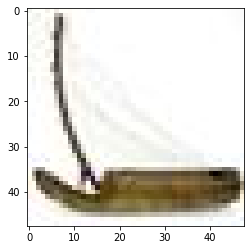

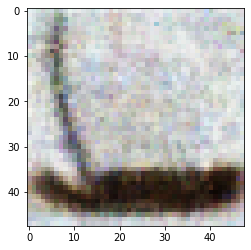

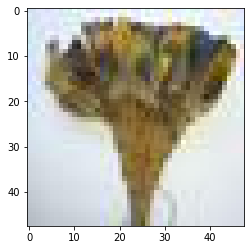

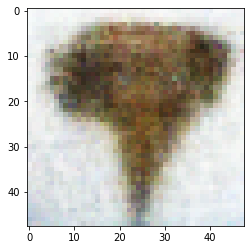

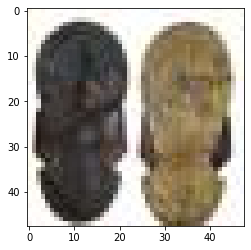

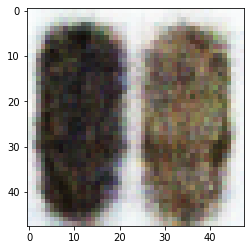

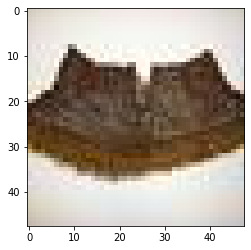

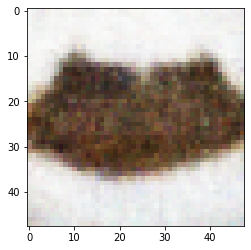

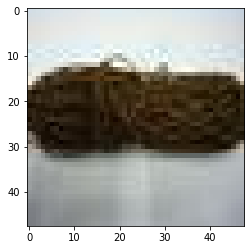

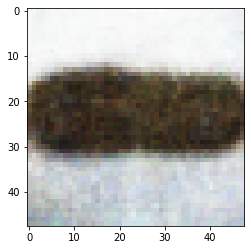

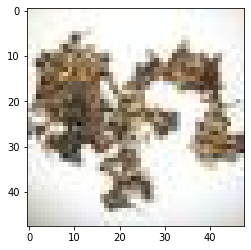

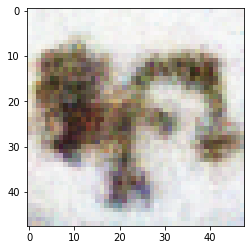

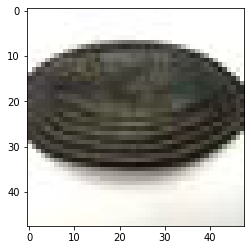

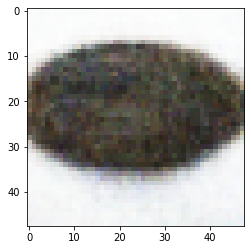

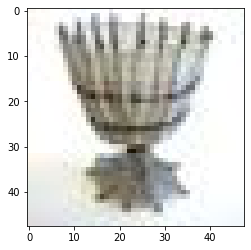

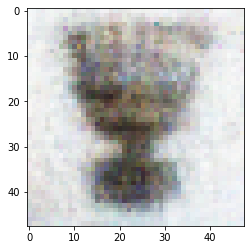

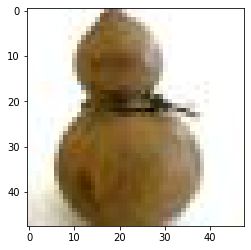

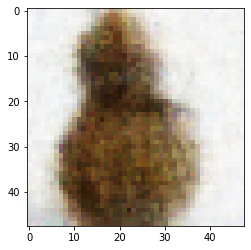

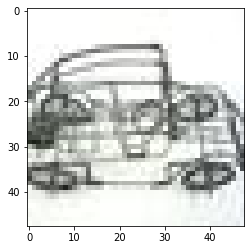

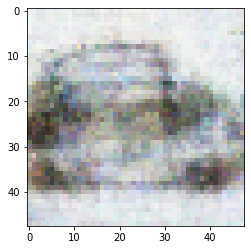

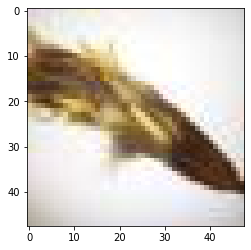

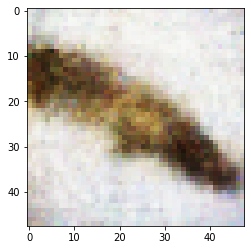

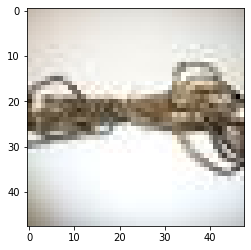

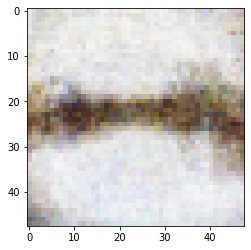

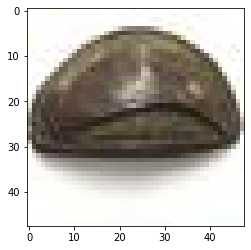

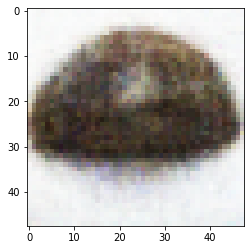

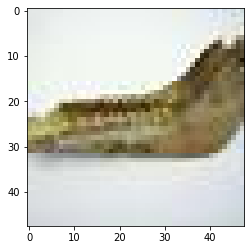

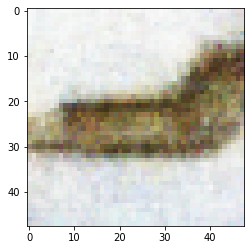

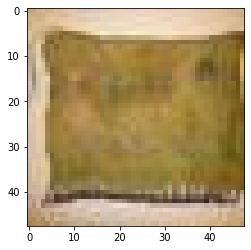

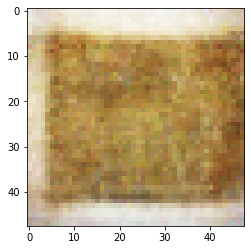

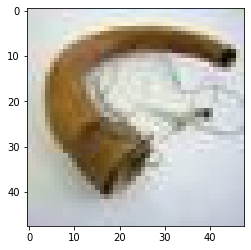

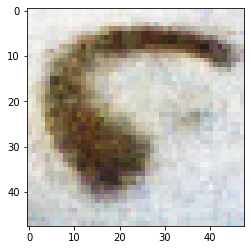

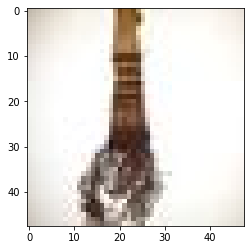

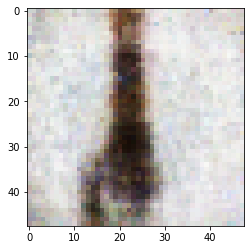

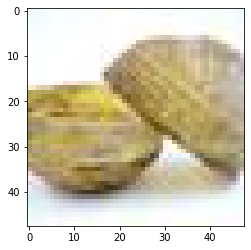

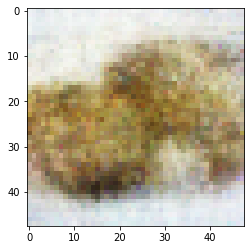

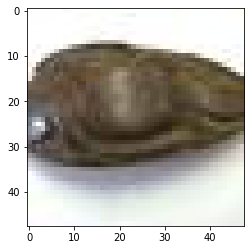

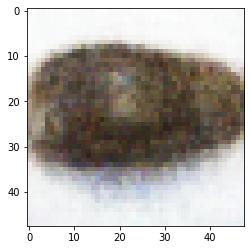

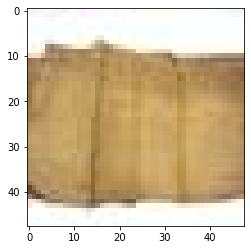

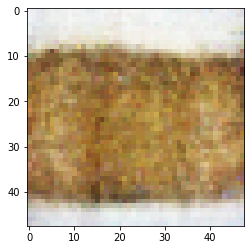

In [ ]:
validate_x = validate_gen[0][0]
validate_y = model.predict(validate_x)

for idx in range(validate_x.shape[0]):
  plt.imshow(validate_x[idx])
  plt.show()
  plt.imshow(validate_y[idx])
  plt.show()




In [ ]:
# !zip -r /content/file.zip /content/data

TODO:

Zwei Beipsiele daraus machen (Version 2 mit Validierungs Generator)

Bessere Bilder (Ethnologie Daten!!!!)